# Ez Templates<a id='top' class="tocSkip"> </a>


This tutorial shows how to easily create templates for [CDAT](https://cdat.llnl.gov)'s VCS

The CDAT software was developed by LLNL. This tutorial was written by Charles Doutriaux. This work was performed under the auspices of the U.S. Department of Energy by Lawrence Livermore National Laboratory under Contract DE-AC52-07NA27344.

[Download the Jupyter Notebook](EzTemplates.ipynb)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Setting-up-the-notebook" data-toc-modified-id="Setting-up-the-notebook-2">Setting up the notebook</a></span></li><li><span><a href="#Creating-Templates-for-2x3-plots" data-toc-modified-id="Creating-Templates-for-2x3-plots-3">Creating Templates for 2x3 plots</a></span></li><li><span><a href="#Accessing-a-specific-template" data-toc-modified-id="Accessing-a-specific-template-4">Accessing a specific template</a></span></li><li><span><a href="#Local-legend" data-toc-modified-id="Local-legend-5">Local legend</a></span></li><li><span><a href="#Controling-the-subplots-aspects" data-toc-modified-id="Controling-the-subplots-aspects-6">Controling the subplots aspects</a></span><ul class="toc-item"><li><span><a href="#Base-template" data-toc-modified-id="Base-template-6.1">Base template</a></span></li><li><span><a href="#Overall-plot-margins" data-toc-modified-id="Overall-plot-margins-6.2">Overall plot margins</a></span></li><li><span><a href="#Spacing-between-plots" data-toc-modified-id="Spacing-between-plots-6.3">Spacing between plots</a></span></li><li><span><a href="#Controlling-the-legend" data-toc-modified-id="Controlling-the-legend-6.4">Controlling the legend</a></span><ul class="toc-item"><li><span><a href="#Legend-direction" data-toc-modified-id="Legend-direction-6.4.1">Legend direction</a></span></li><li><span><a href="#Thickness" data-toc-modified-id="Thickness-6.4.2">Thickness</a></span></li></ul></li><li><span><a href="#Stretching-the-legend" data-toc-modified-id="Stretching-the-legend-6.5">Stretching the legend</a></span><ul class="toc-item"><li><span><a href="#Fonts" data-toc-modified-id="Fonts-6.5.1">Fonts</a></span></li></ul></li></ul></li></ul></div>

# Introduction

[Back to Top](#top)

More often than not one would like to have mutliple plots on a single page (or vcs canvas in our case).

This can be achieved via VCS's templates objects. Tweaking the templates can be tidious, this is where the EzTemplate comes handy, it helps creating vcs template object for most common plot copnfigurations.


# Setting up the notebook

[Back to Top](#top)

In [1]:
from __future__ import print_function, division
from vcsaddons import EzTemplate
from IPython.display import Image
import vcs
import cdms2

vcs.download_sample_data_files()
canvas = vcs.init(bg=True)
f = cdms2.open(vcs.sample_data+"/clt.nc")
clt = f("clt")
gm = vcs.createisofill()
levels = [a for a in range(0,110,25) ]
gm.levels = levels
gm.fillareacolors = vcs.getcolors(levels)

box = vcs.createline()
box.x = [0.001, .999, .999, .001, .001]
box.y = [0.001, .001, .999, .999, .001]

def plot_all(M):
    canvas.clear()
    for i in range(M.rows * M.columns):
        template = M.get(column = i % M.columns, row = i // M.columns)  
# This is vcs template object you could further edit 
    display = canvas.plot(clt[i*2], template, gm)
    return canvas.plot(box)

MD5: /home/nadeau1/.cache/Python-Eggs/vcs-v8.1_9_g266121be-py3.7.egg-tmp/share/vcs/sample_files.txt
Downloading: 'th_yr.nc' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /software/anaconda53/envs/cdms2/share/cdat/sample_data/th_yr.nc
Downloading: 'th_yr.nc' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /software/anaconda53/envs/cdms2/share/cdat/sample_data/th_yr.nc
Downloading: 'th_yr.nc' from 'https://cdat.llnl.gov/cdat/sample_data/' in: /software/anaconda53/envs/cdms2/share/cdat/sample_data/th_yr.nc


# Creating Templates for 2x3 plots

[Back to Top](#top)

Let's say we want have 6 plots, split on 3 rows of 2. Notice the canvas automatically switch to portrait orientation.

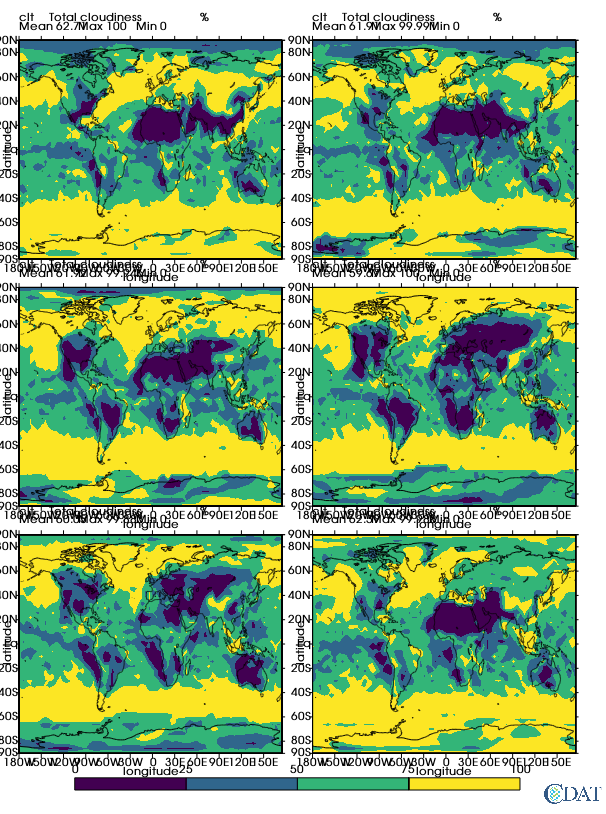

In [2]:
Multiple = EzTemplate.Multi(rows=3, columns=2, x=canvas)
for i in range(6):
    template = Multiple.get()  # This is vcs template object you could further edit
    display = canvas.plot(clt[i*2], template, gm)
display  # for notebook to render final picture

# Accessing a specific template

[Back to Top](#top)

Rather than accessing templates in order, you can retrieve directly a specific object

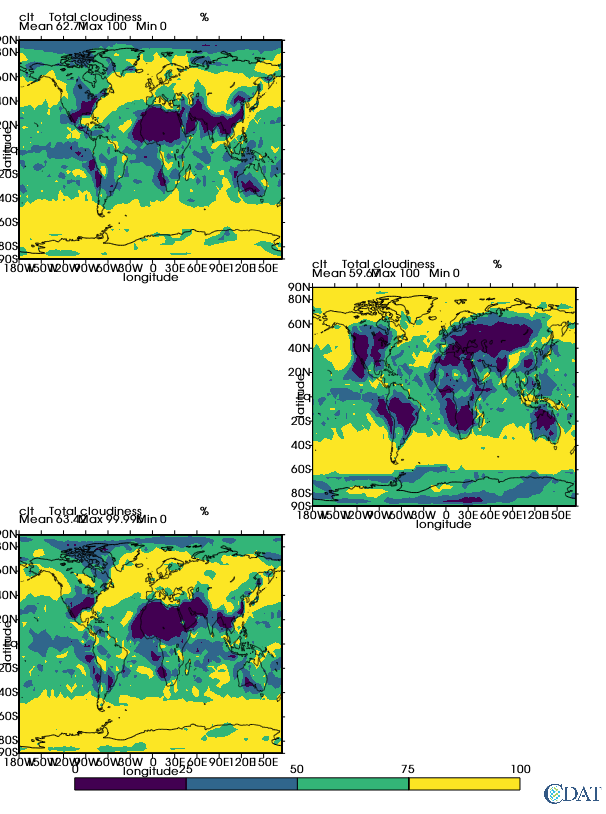

In [3]:
canvas.clear()
template = Multiple.get(row=0, column=0)  # This is vcs template object you could further edit
canvas.plot(clt[0], template, gm)
template = Multiple.get(row=1, column=1)  # This is vcs template object you could further edit
canvas.plot(clt[6], template, gm)
template = Multiple.get(row=2, column=0)  # This is vcs template object you could further edit
canvas.plot(clt[12], template, gm)

# Local legend

[Back to Top](#top)

You probably noticed that only one legend is plotted, sometimes you might want a separate legend for a specific subplot. This can be achieved when you get the template

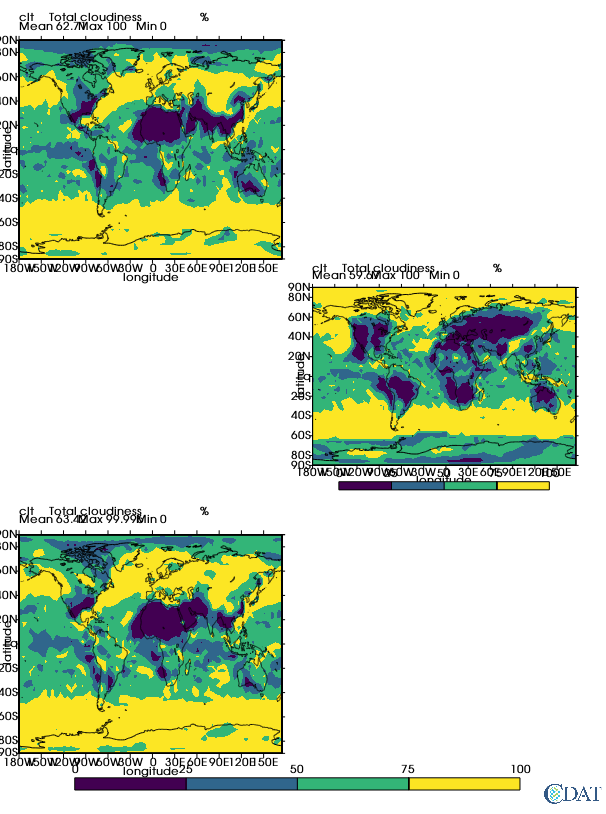

In [4]:
canvas.clear()
canvas.clear()
template = Multiple.get(row=0, column=0)  # This is vcs template object you could further edit
canvas.plot(clt[0], template, gm)
template = Multiple.get(row=1, column=1, legend="local")  # This is vcs template object you could further edit
canvas.plot(clt[6], template, gm)
template = Multiple.get(row=2, column=0)  # This is vcs template object you could further edit
canvas.plot(clt[12], template, gm)

# Controling the subplots aspects

[Back to Top](#top)

Many general aspect of the plot cna be controlled via the `Multi` object. Al ist of controllable aspect and their current values can be accessed vi the `list()` function

In [5]:
Multiple.list()

----------Template (P) member (attribute) listings ----------
rows = 3
columns = 2
template = default
member = margins
top = 0.05
bottom = 0.075
right = 0.05
left = 0.033
member = spacing
horizontal = 0.05
vertical = 0.035
member = legend
direction = horizontal
stretch = 0.8
thickness = 0.2
fat = 0.05


## Base template

[Back to Top](#top)

By default each individual template is generated based on the `default` vcs template. But you can pass it the base template you would like to be used.

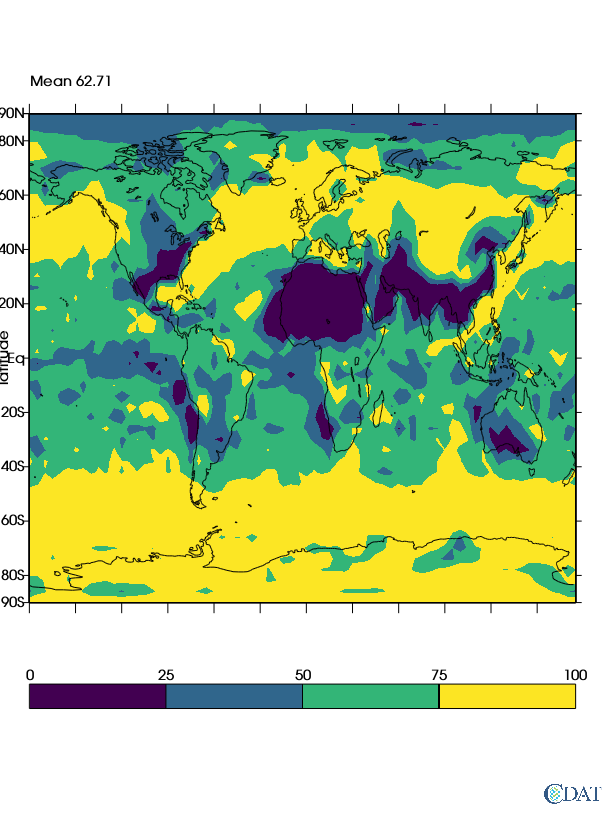

In [6]:
base_template = vcs.createtemplate()
base_template.blank(["title","crtime","crdate",
                     "source","dataname", "units",
                     "tname", "tvalue", "zvalue",
                     "min", "max",
                     "xname", "xlabel1"])
canvas.clear()
canvas.plot(clt,base_template, gm)

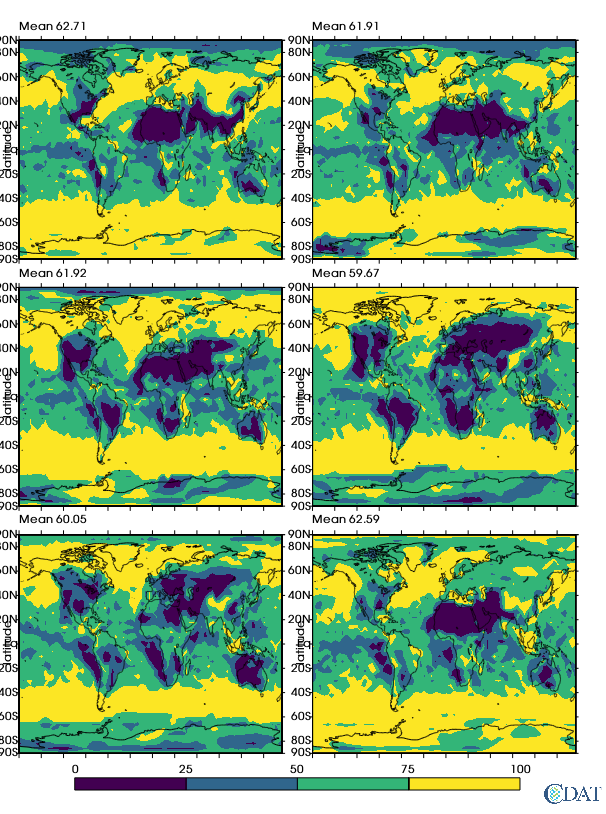

In [7]:
Multiple = EzTemplate.Multi(rows=3, columns=2, template=base_template)
canvas.clear()
for i in range(6):
    template = Multiple.get()  # This is vcs template object you could further edit
    display = canvas.plot(clt[i*2], template, gm)
display  # for notebook to render final picture

## Overall plot margins

[Back to Top](#top)

EzTemplate lets you control around the plot, for this use the `margins` section to the Multi object.

Bellow we use drastic value to for educational purpose.

Notice the legend thickness increased due to more space available from the bottom margin

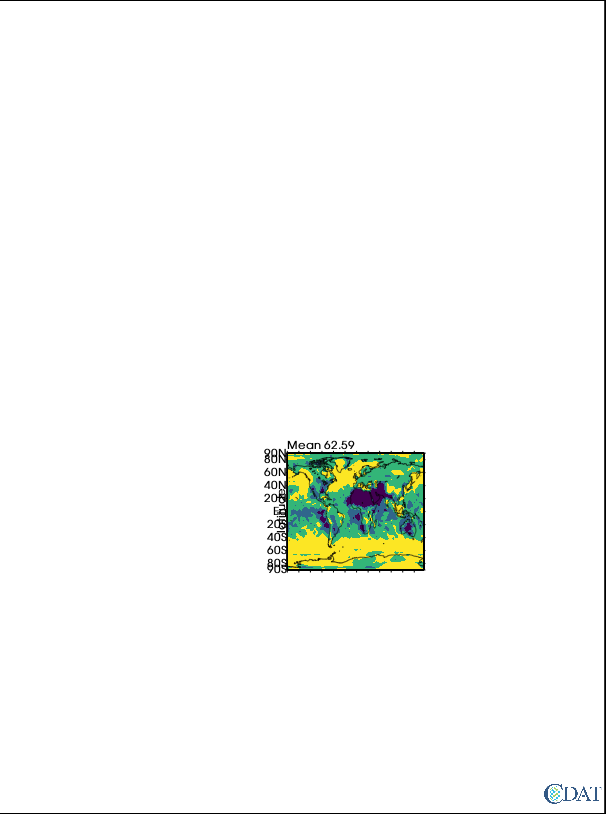

In [8]:
Multiple.margins.top = .2  # 20% margin at the top
Multiple.margins.bottom = .3 # 30% margin from the bottom
Multiple.margins.left = .2  # 20% from left
Multiple.margins.right = .3  # 30% from right
plot_all(Multiple)

## Spacing between plots

[Back to Top](#top)

One can also control how much spacing should be set between plots, for this use the `spacing` section.

Here again we use drastic values for educational purposes.

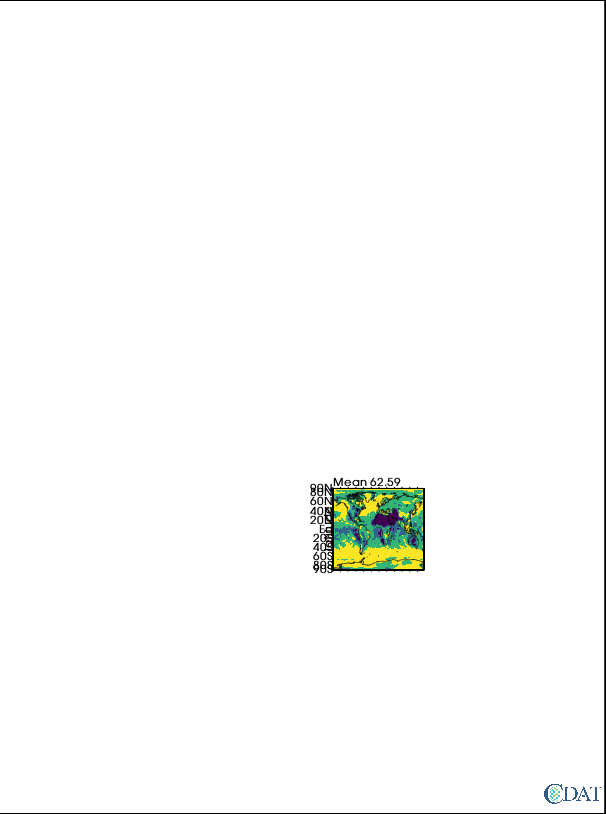

In [9]:
Multiple.spacing.vertical = .1  # 10 % of total page height
Multiple.spacing.horizontal = .2  # 20 % of total page width
plot_all(Multiple)

## Controlling the legend

[Back to Top](#top)

As we mentioned earlier, EzTemplate try to make the best possible use of the free space to plot the overall legend (set on template at row=0, column=0)

### Legend direction

[Back to Top](#top)

By default we use the bottom margin to draw an horizontal legend, but we can opt for a vertical legend in which case the right margin space will be used

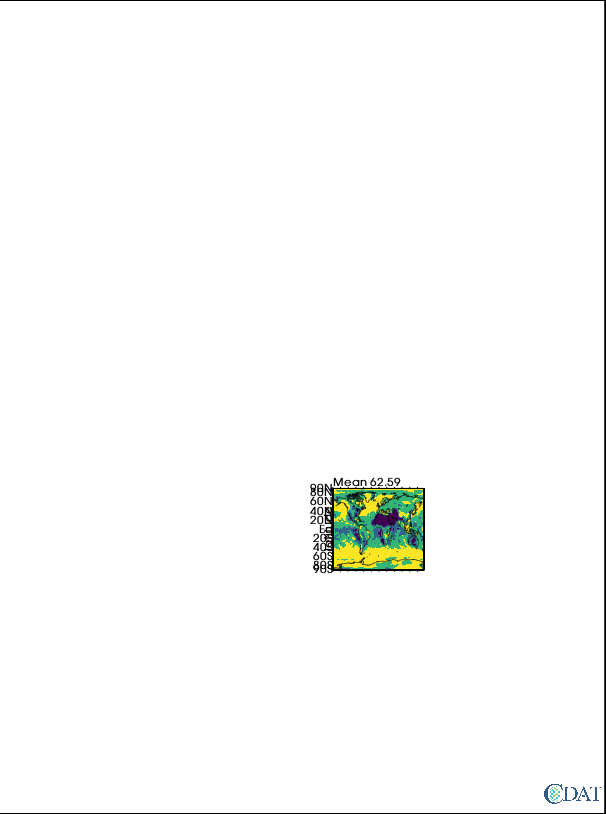

In [10]:
Multiple.legend.direction = "vertical"
plot_all(Multiple)

### Thickness

[Back to Top](#top)

The legend bar thickness can also be controlled 

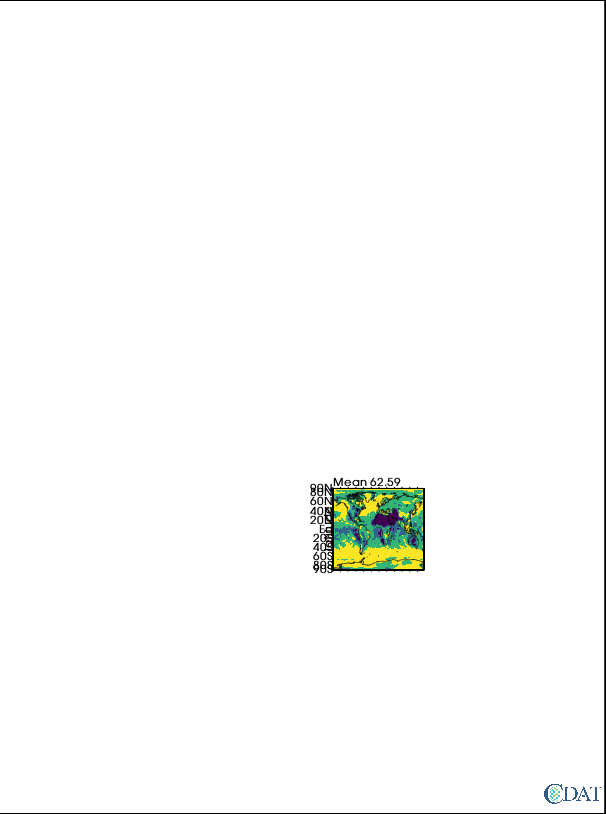

In [11]:
Multiple.legend.thickness = .15 # 15% of available space
plot_all(Multiple)

## Stretching the legend 

[Back to Top](#top)

The amount of space to stretch the legend to is controleld via the `stretch` attribute

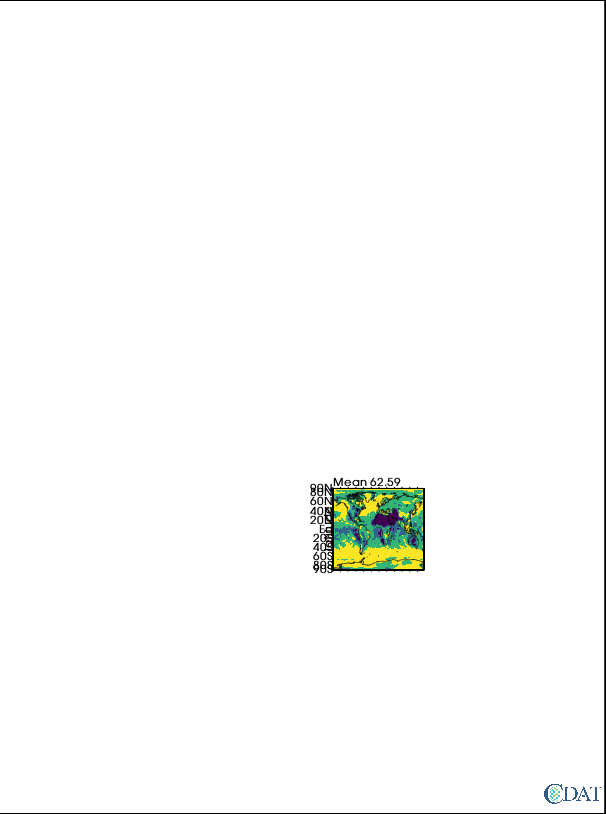

In [12]:
Multiple.legend.stretch = .55 # 55% of available space
plot_all(Multiple)

### Fonts

[Back to Top](#top)

Sometimes if you have too many plots the font scaling can get too drastic and you end up not seeing anything, so by default the fonts will not be scaled less than 80%, but you can limit the font scaling at the `get` time via the `fontlimit` argument

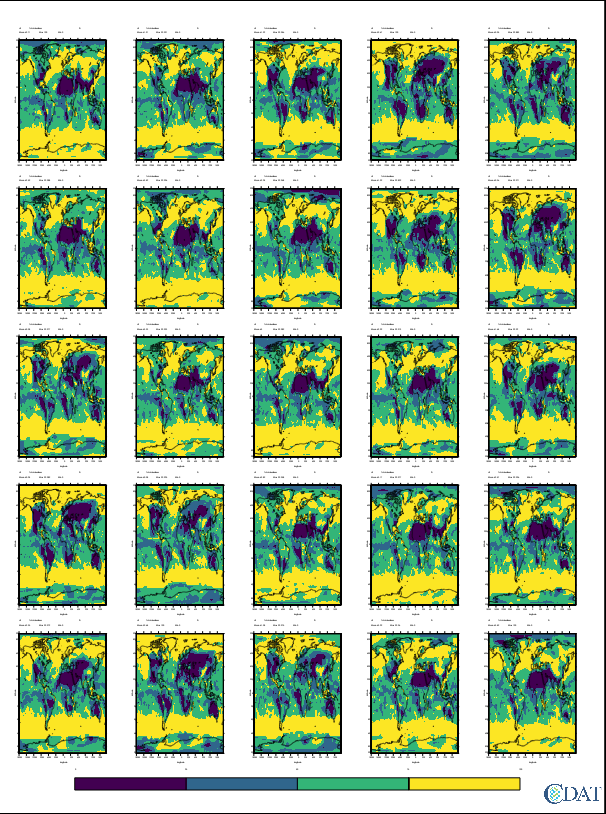

In [13]:
canvas.clear()
Multiple = EzTemplate.Multi(rows=5, columns=5)
for i in range(Multiple.rows * Multiple.columns):
    template = Multiple.get(column = i % Multiple.columns, row = i // Multiple.columns, fontlimit=.1)  # This is vcs template object you could further edit
    display = canvas.plot(clt[i*2], template, gm)
canvas.plot(box)